# Data Cleaning
* Datasets may come in a large range of formats
* Datasets vary in usefulness and quality
* Data is not always recorded consistently and accurately
* It is very important to check our datasets for errors, empty or undefined cells, etc.

* Data cleaning is the process of searching through a dataset to address any problems and inconsistencies, including missing values
* Data cleaning cannot address issues such as bias within a dataset
* Data cleaning resolves issues with data entry and format to prevent errors in processing or incorrect conclusions

In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

def load_data(DATASET_PATH):
    return pd.read_csv(DATASET_PATH)

### Dataset 1: Police Shootings
You can access this dataset here: www.kaggle.com/washingtonpost/police-shootings
> This is an example of a dataset that is:
* Moderate quality
* Categorical

In [2]:
DATASET_PATH = './datasets/police_shooting/fatal-police-shootings-data.csv'

police = load_data(DATASET_PATH)

In [3]:
police.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 13 columns):
name                       5416 non-null object
date                       5416 non-null object
manner_of_death            5416 non-null object
armed                      5189 non-null object
age                        5181 non-null float64
gender                     5414 non-null object
race                       4895 non-null object
city                       5416 non-null object
state                      5416 non-null object
signs_of_mental_illness    5416 non-null bool
threat_level               5416 non-null object
flee                       5167 non-null object
body_camera                5416 non-null bool
dtypes: bool(2), float64(1), object(10)
memory usage: 476.1+ KB


### Choosing a Subset - Feature Selection
* Datasets often contain a large range of data types
* Some of these data types may not be relevant or useful
* Performing feature selection after Exploratory Data Analysis enables you to focus training on data that is relevant to what you want to predict
* Creating a subset of the dataset can be a good way to reduce computational cost, error, etc
* Creating a subset can make it easier to clean data

In [4]:
police_simple = police.filter(['armed','age','race','state','signs_of_mental_illness','flee'])

In [5]:
police_simple.head()

,armed,age,race,state,signs_of_mental_illness,flee
0,gun,53.0,A,WA,True,Not fleeing
1,gun,47.0,W,OR,False,Not fleeing
2,unarmed,23.0,H,KS,False,Not fleeing
3,toy weapon,32.0,W,CA,True,Not fleeing
4,nail gun,39.0,H,CO,False,Not fleeing


There are a few things to look for when cleaning data including: 
* Missing values - this could mean data was unavailable, deliberately excluded, or simpply forgotten 
* 'Placeholder' values used in place of missing values, e.g. 999 for unknown age or 12:00am for unknown date
* Data entered by humans - they are often inconsistent and subject to error such as mispelling  
* This link will help you identify and resolve many bad data issues: https://github.com/Quartz/bad-data-guide

**Firstly, find NaN entries (Missing values)**

In [6]:
null_rows = police_simple.isnull().any(axis=1)
police_simple[null_rows]

,armed,age,race,state,signs_of_mental_illness,flee
15,NaN,28.0,W,MT,False,Not fleeing
26,NaN,24.0,B,MN,False,Not fleeing
27,NaN,29.0,W,MO,False,Not fleeing
45,NaN,42.0,B,AZ,False,Car
52,NaN,29.0,B,FL,False,Not fleeing
59,gun,59.0,NaN,NJ,False,Not fleeing
60,NaN,17.0,H,CO,False,Not fleeing
65,NaN,26.0,N,AZ,False,Not fleeing
105,NaN,23.0,W,CA,False,Car
122,NaN,50.0,H,TX,False,Not fleeing


In [7]:
def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

In [8]:
check_NaN(police_simple)

Total NaN: 1232
NaN by column:
 armed                      227
age                        235
race                       521
state                        0
signs_of_mental_illness      0
flee                       249
dtype: int64


> Given there are undefined values, we have three choices:
* Remove affected rows
* Remove affected attributes, e.g. remove the entire column showing whether the person killed was armed
* Fill blank with 'dummy' data, e.g "unreported"

In [9]:
def fillNaN_unreported(dataframe, key):
    dataframe[key].fillna("unreported", inplace = True)
    return 

In [10]:
fillNaN_unreported(police_simple, "armed")
fillNaN_unreported(police_simple, "race")
fillNaN_unreported(police_simple, "flee")

median = police_simple["age"].median()
police_simple["age"].fillna(median, inplace = True)

In [11]:
check_NaN(police_simple)

Total NaN: 0
NaN by column:
 armed                      0
age                        0
race                       0
state                      0
signs_of_mental_illness    0
flee                       0
dtype: int64


Impact of NaN values on data

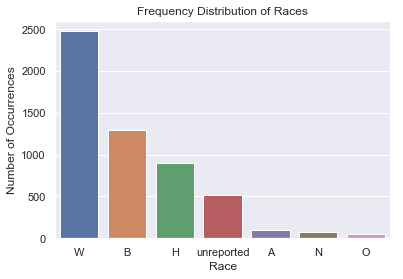

In [12]:
import seaborn as sns

race_count = police_simple['race'].value_counts()
sns.set(style="darkgrid")
sns.barplot(race_count.index, race_count.values)
plt.title('Frequency Distribution of Races')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.show()

**Let's look for 'placeholder' values used in place of missing values**

In [26]:
#check the age column for impossible ages
for each_age in police_simple['age']:
    if each_age > 100 or each_age < 0:
        print(each_age)

**Let's consider if any values were entered by humans**

In [13]:
#check for spelling errors
police_simple['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unreported',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'unknown weapon',
       'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'baton', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake',
       'crowbar', 'oar', 'machete and gun', 'tire

In [14]:
police_simple.loc[police_simple['armed'] == 'undetermined', 'armed'] = "unreported"

In [15]:
police_simple['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unreported',
       'shovel', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
       'guns and explosives', 'cordless drill', 'crossbow', 'metal pole',
       'Taser', 'metal pipe', 'metal hand tool', 'blunt object',
       'metal stick', 'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'unknown weapon', 'stapler', 'beer bottle',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'vehicle', 'baton',
       'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock',
       'piece of wood', 'bayonet', 'pipe', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake', 'crowbar', 'oar', 'machete and gun',
       'tire iron', 'air con

In [16]:
police_simple.loc[police_simple['armed'] == 'unknown weapon', 'armed'] = "unreported"

In [17]:
police_simple['armed'].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'unreported',
       'shovel', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'metal object', 'screwdriver', 'lawn mower blade', 'flagpole',
       'guns and explosives', 'cordless drill', 'crossbow', 'metal pole',
       'Taser', 'metal pipe', 'metal hand tool', 'blunt object',
       'metal stick', 'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'stapler', 'beer bottle', 'bean-bag gun',
       'baseball bat and fireplace poker', 'straight edge razor',
       'gun and knife', 'ax', 'brick', 'baseball bat', 'hand torch',
       'chain saw', 'garden tool', 'scissors', 'pole', 'pick-axe',
       'flashlight', 'vehicle', 'baton', 'spear', 'chair', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet', 'pipe',
       'glass shard', 'motorcycle', 'pepper spray', 'metal rake',
       'crowbar', 'oar', 'machete and gun', 'tire iron',
       'air conditioner', 'pole a

### Dataset 2: World Happiness Report up to 2020
You can access this dataset here: www.kaggle.com/mathurinache/world-happiness-report 
> This is an example of a dataset that is:
* High quality
* Numerical

In [18]:
DATASET_PATH = './datasets/happiness/2015.csv'

#create pandas object
happiness = load_data(DATASET_PATH)

In [19]:
check_NaN(happiness)

Total NaN: 0
NaN by column:
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64


In [20]:
happiness.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
